# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


In [1]:
# Mount google drive for working on the assignment through Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Library imports
import platform
import itertools
import scipy.stats
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(platform.sys.version)

# Import wine.mat from google drive
wine = sio.loadmat('/content/drive/My Drive/Assignment_2/Data/wine.mat')

3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [3]:
#create a list of attributes from the wine.mat file
wineAttributes = []

# We know from the assignment discription (and when looking at the file) that wine['X'] has 12 attributes
for i in range(12):
    # Get the first array, then the i array and then the first value
    wineAttribute = wineAttributes.append(wine['attributeNames'][0][i][0])

#Generates the following list of attributes
print(wineAttributes)

['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality score (0--10)']


In [4]:
#Take a look at wine['X']
wine['X']

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [0]:
#Create a dataframe with wine['X'] as the data and wineAttributes as the columns
df = pd.DataFrame(wine['X'], columns = wineAttributes, dtype = float) 

In [6]:
# Look at some more information in the now correctly made dataset
df.describe()

# You can already see the weird mean and std on some columns (Volatile acidity, Density, Alcohol)

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality score (0--10)
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6.497000e+03,6497.000000
mean,7.215307,1.319138,0.318633,5.443235,0.056034,30.525319,115.744574,739.810738,3.218501,0.531268,1.732677e+12,5.818378
std,1.296434,32.304173,0.145318,4.757804,0.035034,17.749400,56.521855,7728.072167,0.160787,0.148806,3.444407e+13,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000e+00,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000e+00,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,1.030000e+01,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,1.130000e+01,6.000000
max,15.900000,1185.000000,1.660000,65.800000,0.611000,289.000000,440.000000,103898.000000,4.010000,2.000000,9.733333e+14,9.000000


In [0]:
# Standardize the new dataset
for i, attribute in enumerate(df.columns):
    zscore = attribute + '_zscore'
    df[zscore] =  scipy.stats.zscore(df[attribute])

In [8]:
df.iloc[0:, 12:].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Fixed acidity_zscore,Volatile acidity_zscore,Citric acid_zscore,Residual sugar_zscore,Chlorides_zscore,Free sulfur dioxide_zscore,Total sulfur dioxide_zscore,Density_zscore,pH_zscore,Sulphates_zscore,Alcohol_zscore,Quality score (0--10)_zscore
count,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497
mean,1.00747e-15,1.11853e-16,-7.00789e-17,-1.69355e-15,3.32059e-16,1.00923e-15,-9.6581e-16,9.19775e-18,3.0868e-15,4.27035e-16,-3.12463e-16,6.44496e-16
std,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008
min,-2.63459,-0.0383614,-2.19283,-1.01803,-1.34264,-1.66358,-1.94178,-0.0956099,-3.10062,-2.09194,-0.0503079,-3.22769
25%,-0.628933,-0.0337177,-0.472334,-0.765798,-0.514799,-0.762074,-0.685532,-0.0956093,-0.674862,-0.680592,-0.0503079,-0.93723
50%,-0.166089,-0.0318602,-0.0594138,-0.513561,-0.257883,-0.085943,0.0399067,-0.0956089,-0.0528742,-0.142937,-0.0503079,0.207999
75%,0.373895,-0.0284548,0.491146,0.558444,0.255949,0.590188,0.712265,-0.0956087,0.631312,0.461924,-0.0503079,0.207999
max,6.69943,36.6446,9.23128,12.6868,15.8422,14.5636,5.73726,13.3495,4.92303,9.87088,28.2102,3.64369


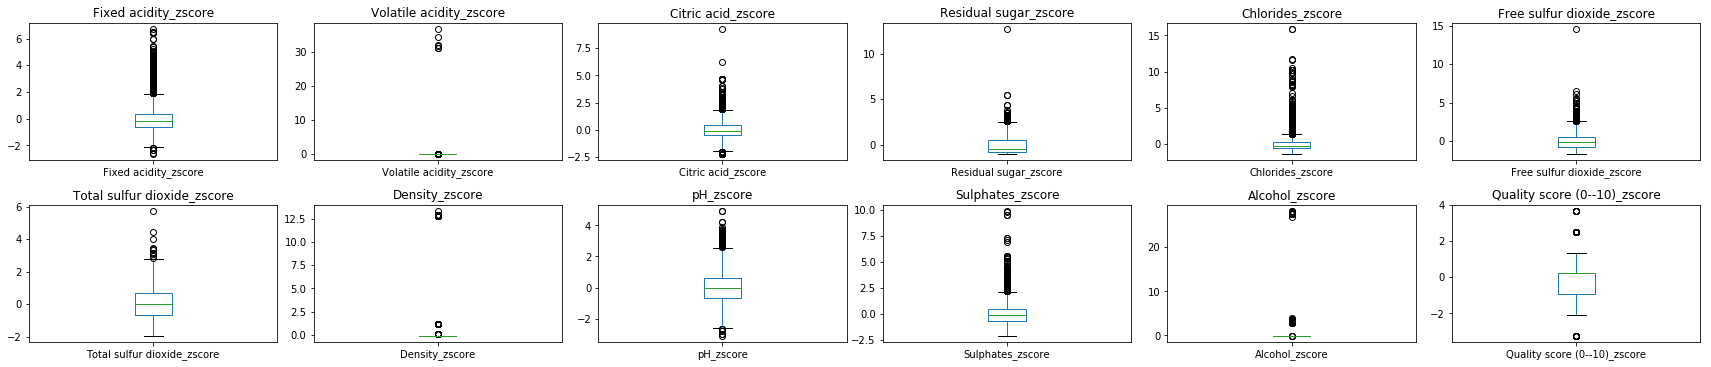

Figure 1: Box plot of the distribution of the standardized values per attribute, we can see here that there are many outliers per attribute, we don't see a box plot for the following boxplots: Volatile acidity, Density and Alcohol


In [9]:
plt.figure(figsize=(24,10)) 
for i,attribute in enumerate(df.iloc[0:, 12:]):
  plt.subplot(4,6,i+1)
  df[attribute].plot.box()
  plt.title(attribute)
    
plt.tight_layout()    
plt.show()
print('Figure 1: Box plot of the distribution of the standardized values per attribute, we can see here that there are many outliers per attribute, we don\'t see a box plot for the following boxplots: Volatile acidity, Density and Alcohol' )



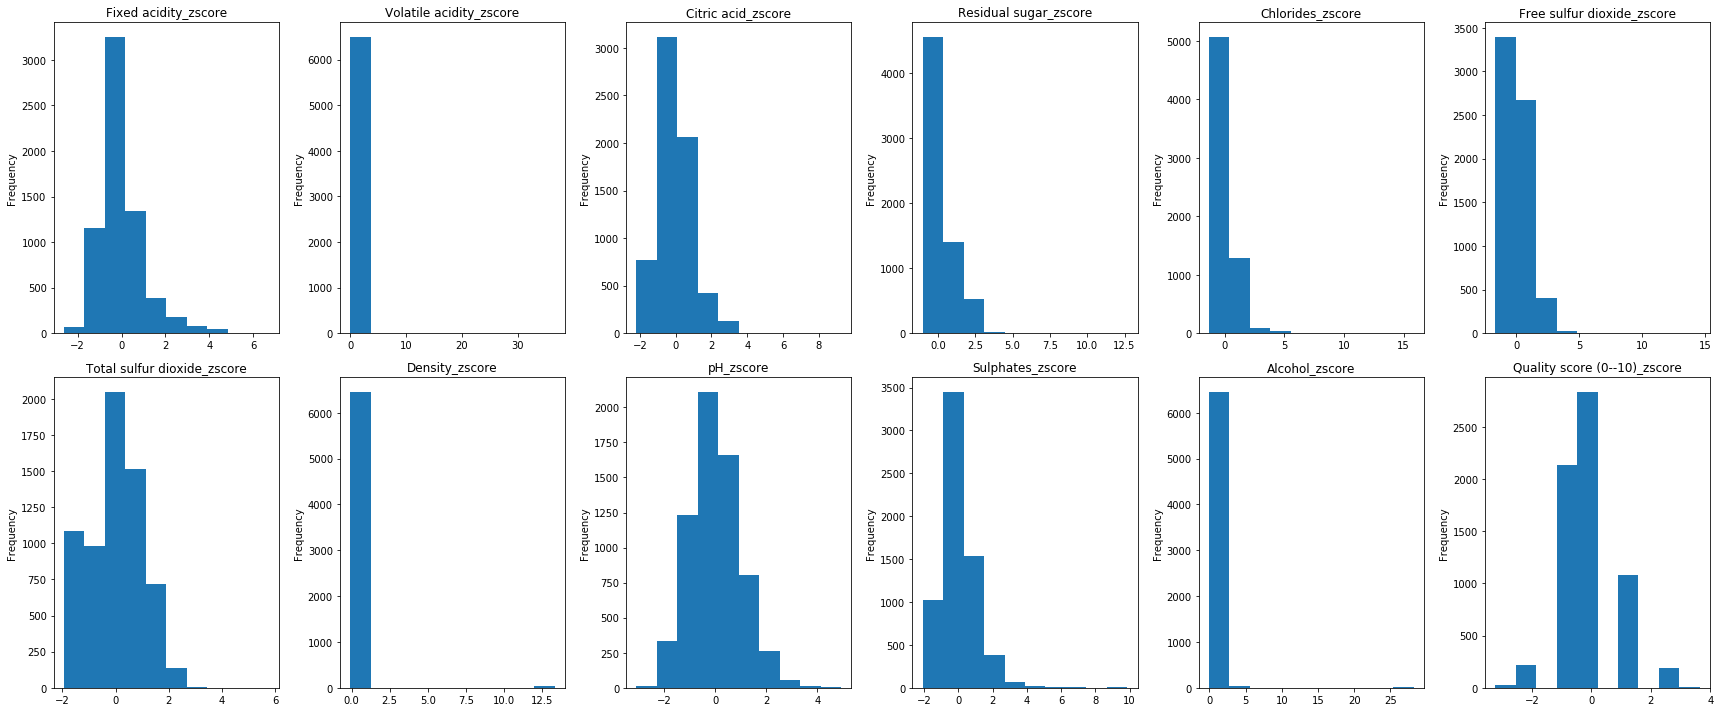

Figure 2: Histogram plot of the distribution of standardized values per attribute, we see that there are a lot of near 0 values on the Volatile acidity, Density and Alcohol attribute


In [10]:
plt.figure(figsize=(24,10)) 
for i, attribute in enumerate(df.iloc[0:, 12:]):
    plt.subplot(2,6,i+1)
    df[attribute].plot.hist()
    plt.title(attribute)
    
plt.tight_layout()    
plt.show()
print('Figure 2: Histogram plot of the distribution of standardized values per attribute, we see that there are a lot of near 0 values on the Volatile acidity, Density and Alcohol attribute')

> From prior knowledge we expect <b>volatile acidity to be around 0-2 g/dm3</b>, <b>density to be close to 1 g/cm3</b>, and <b>alcohol percentage to be somewhere between 5-20% vol.</b> We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. 

In [11]:
filter_df_acid=np.where(df['Volatile acidity']>20)[0]
# close to 1 so 10 x 1 = 10
filter_df_dens=np.where(df['Density']>10)[0]
# max expected is 20% so 20 x 10 = 200
filter_df_alcohol=np.where(df['Alcohol']>200)[0]

# Add the rows together and check for duplicates
combine_df_filters=np.unique(np.concatenate([filter_df_acid,
                                         filter_df_dens,
                                         filter_df_alcohol])) 

#Drop the rows(samples) from the dataframe and call it 'df_filtered'
df_filtered=df.drop(df.index[combine_df_filters])

# Standardize the new dataset
for i, attribute in enumerate(df.iloc[0:, :12]):
    zscore = attribute + '_zscore'
    df_filtered[zscore] =  scipy.stats.zscore(df_filtered[attribute])

# Show the standardized values for every column (found this neat lambda function to suppress the scientific notation. https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation)
df_filtered.iloc[0:, 12:].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Fixed acidity_zscore,Volatile acidity_zscore,Citric acid_zscore,Residual sugar_zscore,Chlorides_zscore,Free sulfur dioxide_zscore,Total sulfur dioxide_zscore,Density_zscore,pH_zscore,Sulphates_zscore,Alcohol_zscore,Quality score (0--10)_zscore
count,6304,6304,6304,6304,6304,6304,6304,6304,6304,6304,6304,6304
mean,1.86429e-15,1.96006e-15,5.49476e-17,-6.08633e-16,-1.70817e-15,-4.07081e-15,-1.15443e-16,-4.28306e-15,1.60719e-15,2.03718e-15,-2.13274e-16,-7.37478e-18
std,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008,1.00008
min,-2.80934,-1.58446,-2.19583,-1.03823,-1.32986,-1.6664,-1.95812,-2.64512,-3.10974,-2.09084,-2.11112,-3.23214
25%,-0.636709,-0.662914,-0.528534,-0.773284,-0.503027,-0.762405,-0.671883,-0.807731,-0.683311,-0.669014,-0.849445,-0.943282
50%,-0.135332,-0.294294,-0.04224,-0.530415,-0.246426,-0.084409,0.0426944,0.087862,-0.0611502,-0.195073,-0.176551,0.201146
75%,0.366044,0.381508,0.513525,0.595615,0.238267,0.593587,0.703679,0.79865,0.623226,0.481985,0.664567,0.201146
max,7.30176,7.63103,9.33629,3.81915,15.834,14.6055,5.79504,1.93591,4.91613,9.9608,3.69259,3.63443


Original


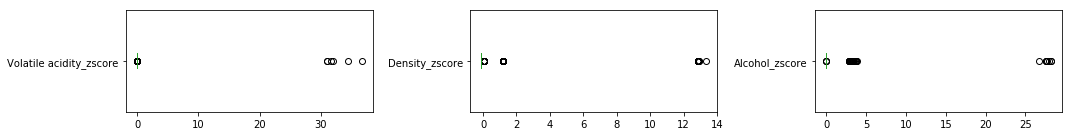

Without the outliers


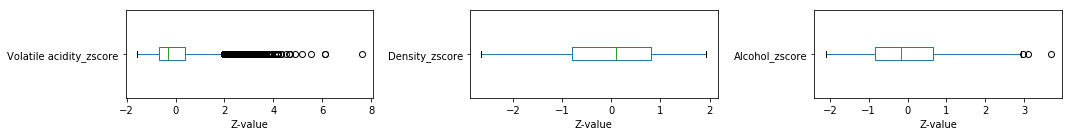

Figure 3: After removing the most egregious of outliers there seems to still be a lot of them for the volatile acidity attribute and some for the Alcohol attribute. Now we can actually identify the box plots


In [12]:
print('Original')
plt.figure(figsize=(15,2)) 
for i,attribute in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    df[attribute].plot.box(vert=False)
    
plt.tight_layout()    
plt.show()
print('Without the outliers')
plt.figure(figsize=(15,2)) 
for i,attribute in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    df_filtered[attribute].plot.box(vert=False)
    plt.xlabel('Z-value')
    
plt.tight_layout()    
plt.show()
print('Figure 3: After removing the most egregious of outliers there seems to still be a lot of them for the volatile acidity attribute and some for the Alcohol attribute. Now we can actually identify the box plots')

Original


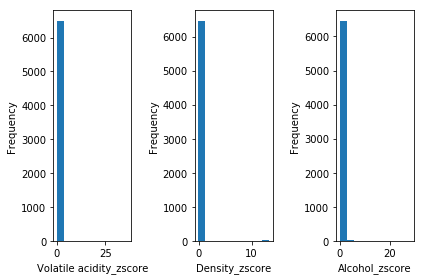

Without the outliers


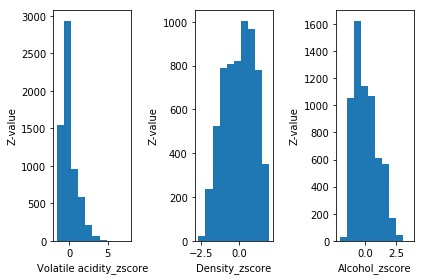

Figure 4: After removing the most egregious of outliers we can conclude that the standardized values are more evenly distributed


In [13]:
print('Original')
plt.figure(figsize=(6,4)) 
for i,attribute in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    plt.xlabel(attribute)
    df[attribute].plot.hist()
    
plt.tight_layout()    
plt.show()

print('Without the outliers')
plt.figure(figsize=(6,4)) 
for i,attribute in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    df_filtered[attribute].plot.hist()
    plt.xlabel(attribute)
    plt.ylabel('Z-value')
    
plt.tight_layout()    
plt.show()
print('Figure 4: After removing the most egregious of outliers we can conclude that the standardized values are more evenly distributed')

----


----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 



“Standardizing” a vector most often means subtracting a measure of location and dividing by a measure of scale. For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1.

- Practical reason
   - By standardizing you attempt to evenly distribute values. This helps to have a better understanding of your data.

- Statistical reason
   - Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.
   - For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability. https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

----


----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

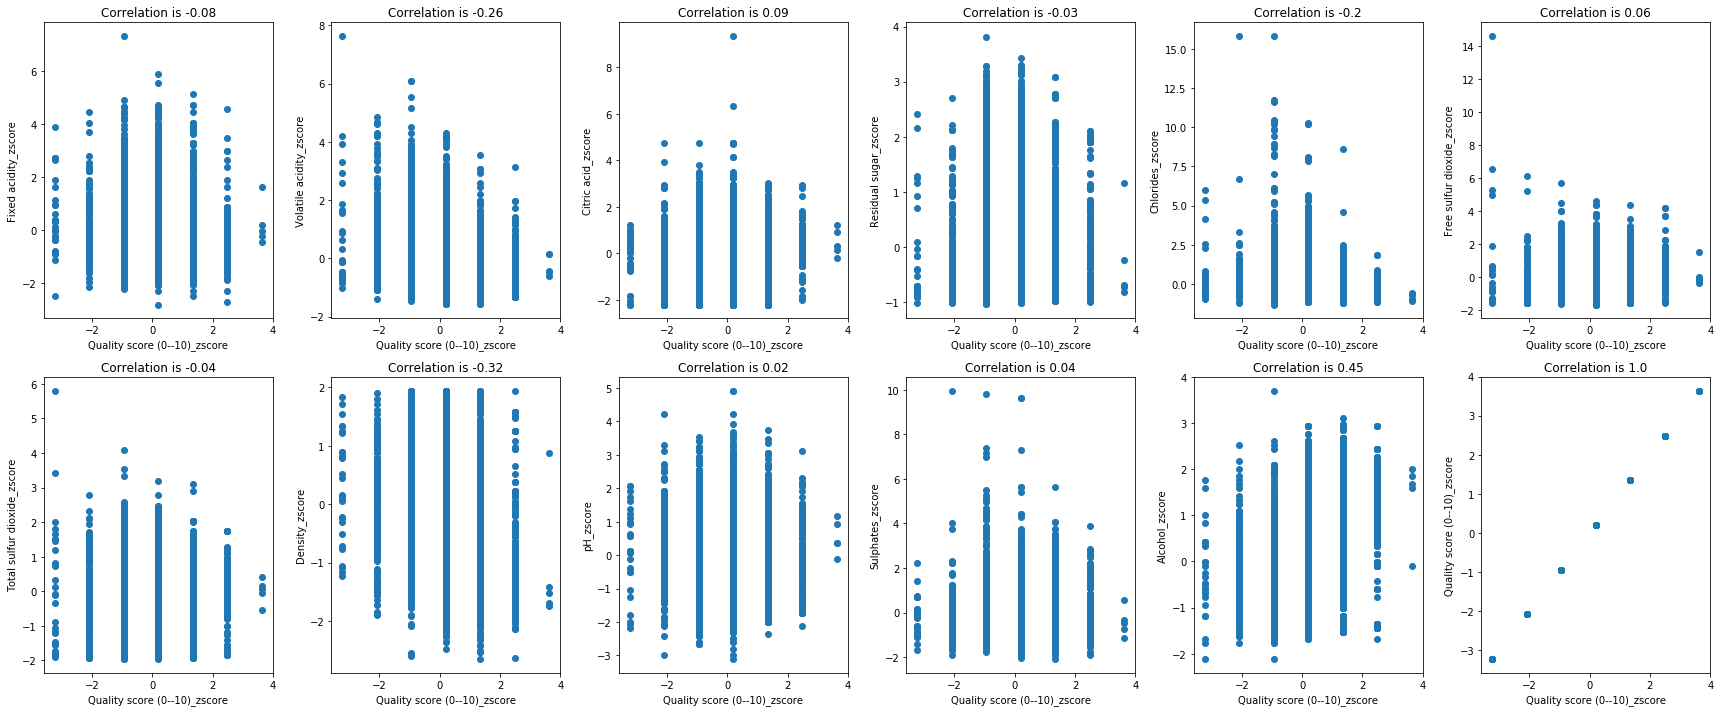

Figure 5: Scatter plot and correlation coefficient of the wine quality


In [14]:
plt.figure(figsize=(24,10)) 
for i,attribute in enumerate(df_filtered.iloc[0:, 12:]):
    plt.subplot(2,6,i+1)
    plt.scatter(df_filtered['Quality score (0--10)_zscore'], df_filtered[attribute])
    plt.xlabel('Quality score (0--10)_zscore')
    plt.ylabel(attribute)
    correlation = scipy.stats.pearsonr(df_filtered['Quality score (0--10)_zscore'],df_filtered[attribute])
    plt.title('Correlation is '+str(round(correlation[0],2)))

plt.tight_layout()    
plt.show()
print('Figure 5: Scatter plot and correlation coefficient of the wine quality')

Manually identify clear relationships from these scatter plots is nearly impossible without calculating the correlation coefficient.

When we do have the correlation coefficient we can see that:
- Significant possitive correlation with alcohol percentage (0.45) and wine quality score.
- Significant negative correlation with Density (-0.32) and Volatile acid (-0.26) and wine quality score.

----


----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


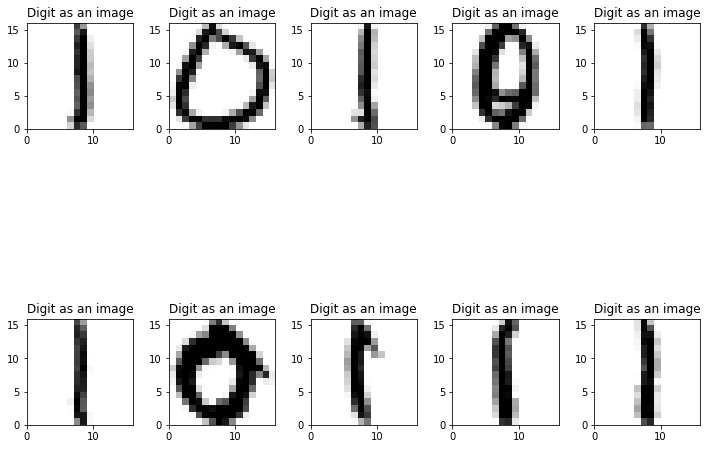

FIgure 6: Example figure


In [15]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape
%matplotlib inline

# Load Matlab data file to python dict structure
mat_data = loadmat('/content/drive/My Drive/Assignment_2/Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Get indices of digits with class 0 or 1, and extract only these from y and X.
zeros = np.where(y == 0)[0]
ones = np.where(y == 1)[0]
zandones = np.sort(np.concatenate([zeros,ones]))
X=X[zandones]
y=y[zandones]

# Visualize the i'th digit as an image
# Index of the digit to display
plt.figure(figsize=(10,10)) 
for i in range(10):
  plt.subplot(2,5,i+1);
  I = reshape(X[i,:],(16,16))
  plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
  plt.title('Digit as an image');
  
plt.tight_layout()    
plt.show()
print('FIgure 6: Example figure')
#------------------------------------------------

In [0]:
U,s,V =np.linalg.svd(X)

# Project the dataset onto the Principal Components use dot function and reverse transpose V.T to V (by using .T)
pcsX = V.T[:,:4]

Z = X@pcsX

u = X.mean()

# Reconstruct the data from projection
W = Z@pcsX.T + u

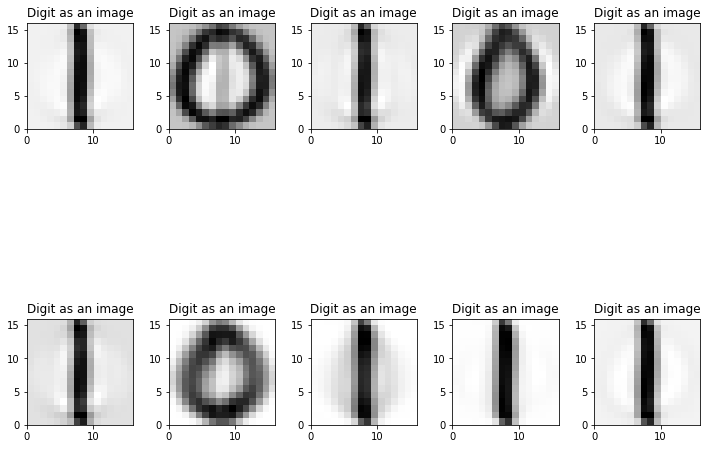

Figure 7: The reconstructed counterparts look really accurate compared to the original images


In [17]:
# Visualize the i'th digit as an image
# Index of the digit to display
plt.figure(figsize=(10,10)) 
for i in range(10):
  plt.subplot(2,5,i+1)
  I = reshape(W[i,:],(16,16))
  plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
  plt.title('Digit as an image')
        
plt.tight_layout()
plt.show()
print('Figure 7: The reconstructed counterparts look really accurate compared to the original images')

In [0]:
# Get the ones and zeros
zeros = np.where(y == 0)
ones = np.where(y == 1)

Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in Z) against each other. You can leave the diagonal blank. Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.

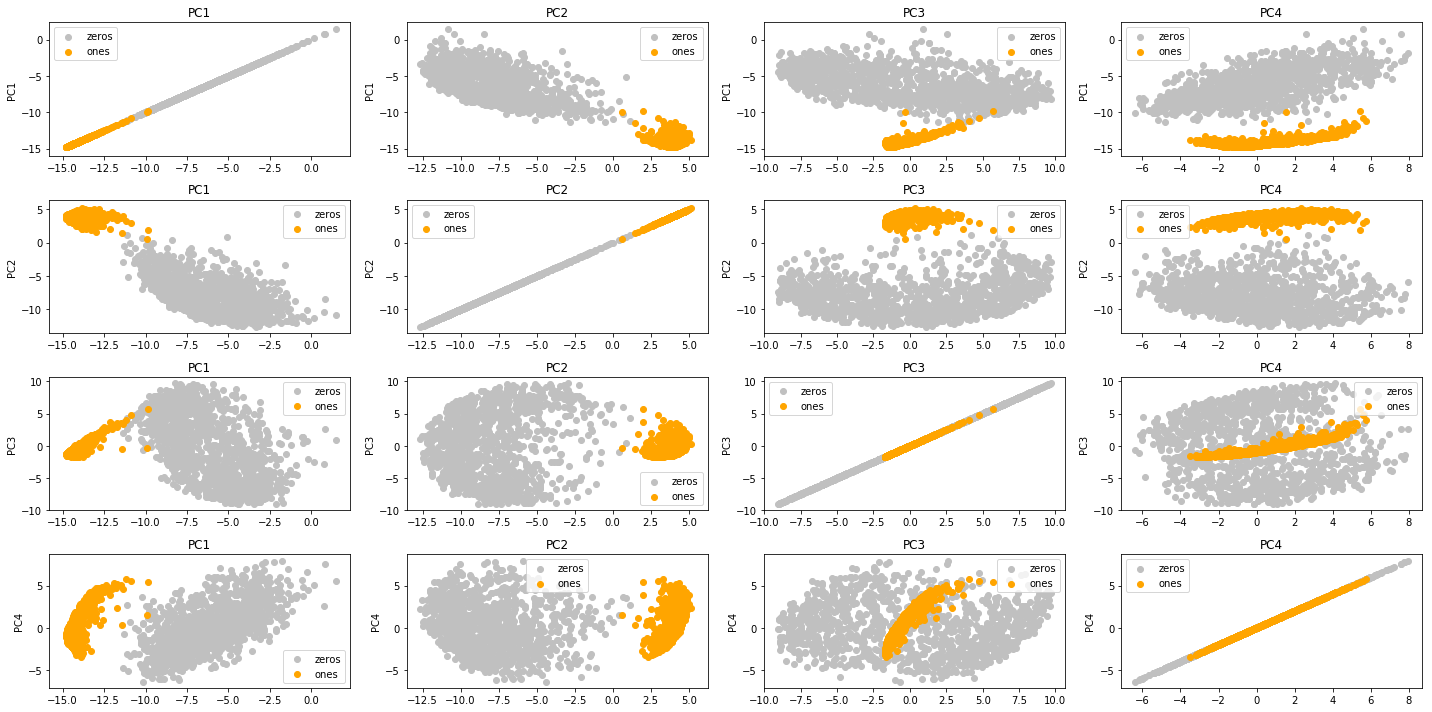

Figure 8: Each possible combination projection onto PC1 to PC4 (contained in Z) against each other


In [19]:
# This took me way too much effort :(
# So many google searches going to waste (pair plots/ dataframes / scatter matrices you name it)
fig, axs = plt.subplots(4, 4, figsize=(20,10))

for i in range(4):  
  pltylabel = 'PC' + str(i+1)
  for j in range(4):
    pltytitle = 'PC' + str(j+1)
    axs[i, j].scatter(Z[:,j][zeros],Z[:,i][zeros], label="zeros", color='silver')
    axs[i, j].scatter(Z[:,j][ones],Z[:,i][ones], label="ones", color='orange')
    axs[i, j].set(title=pltytitle, ylabel=pltylabel)
    axs[i, j].legend(loc="best")
  
plt.tight_layout()
plt.show()

print('Figure 8: Each possible combination projection onto PC1 to PC4 (contained in Z) against each other')

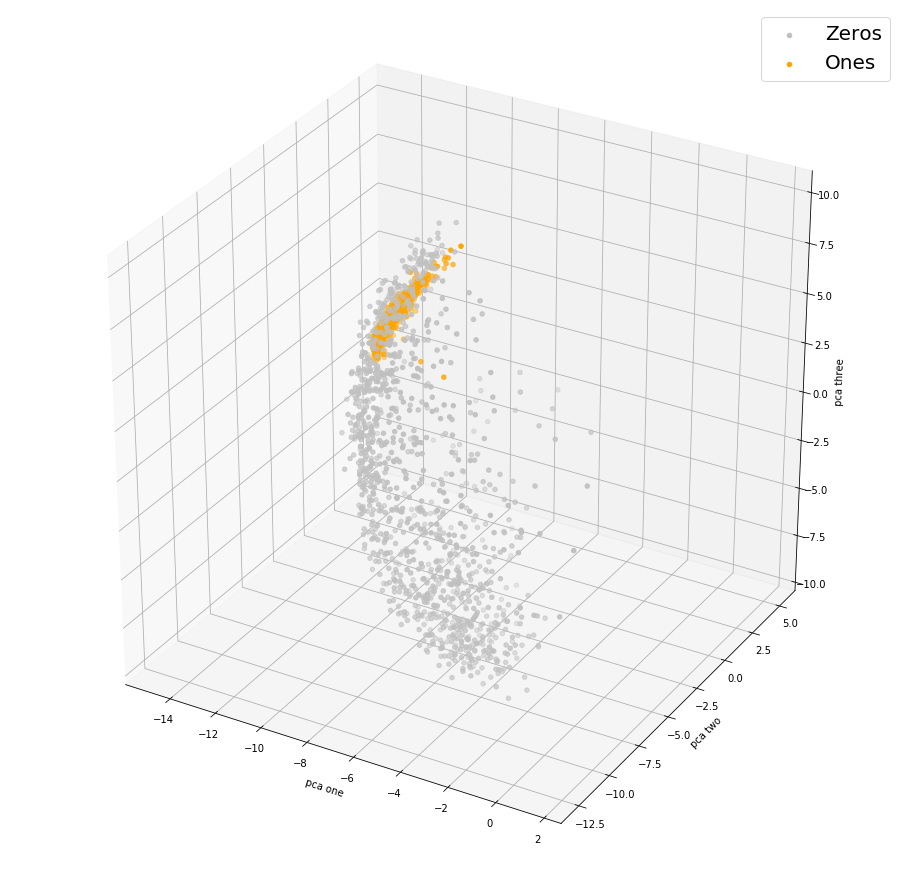

Figure 9: A 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in Z)


In [20]:
# Source = https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
ax = plt.figure(figsize=(16,16)).gca(projection='3d')
ax.scatter(
    xs=Z[:,0][zeros],
    ys=Z[:,1][zeros],
    zs=Z[:,2][zeros],
    c='silver',
    cmap='tab10',
    label='Zeros'
)

ax.scatter(
    xs=Z[:,0][ones],
    ys=Z[:,1][ones],
    zs=Z[:,2][ones],
    c='orange',
    cmap='tab10',
    label='Ones'
)
ax.legend(prop={'size': 20})
ax.set_xlabel('pca one')
ax.set_ylabel('pca two')
ax.set_zlabel('pca three')
plt.show()

print('Figure 9: A 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in Z)')

The ones seems to be clustered more closely together than the zeros. The writings of the ones seem to be very similar and so the variance seems to be clustered. The zeros seem to be more spread out because all of them have a kind of unique shape. And therefore there is no real pattern in the variance.

----


----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [21]:
data = np.array([2,3,6,8,11,18])
m = np.ndarray.mean(data)
print(m)
std = np.ndarray.std(data)
print(std)

8.0
5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [22]:
combo2 = itertools.combinations(data, 2)
#print (list(combo))
# Jonathan: I added some text and the samples themselfs to better understand how the calculation is done
print("Mean of samples of two aliens:")
for x2 in combo2: 
  print('Sample', x2 , 'is ', np.mean(x2))
print()  
combo4 = itertools.combinations(data, 4)
print("Mean of samples of four aliens:")
for x4 in combo4:
  print('Sample', x4 , 'is ', np.mean(x4))

Mean of samples of two aliens:
Sample (2, 3) is  2.5
Sample (2, 6) is  4.0
Sample (2, 8) is  5.0
Sample (2, 11) is  6.5
Sample (2, 18) is  10.0
Sample (3, 6) is  4.5
Sample (3, 8) is  5.5
Sample (3, 11) is  7.0
Sample (3, 18) is  10.5
Sample (6, 8) is  7.0
Sample (6, 11) is  8.5
Sample (6, 18) is  12.0
Sample (8, 11) is  9.5
Sample (8, 18) is  13.0
Sample (11, 18) is  14.5

Mean of samples of four aliens:
Sample (2, 3, 6, 8) is  4.75
Sample (2, 3, 6, 11) is  5.5
Sample (2, 3, 6, 18) is  7.25
Sample (2, 3, 8, 11) is  6.0
Sample (2, 3, 8, 18) is  7.75
Sample (2, 3, 11, 18) is  8.5
Sample (2, 6, 8, 11) is  6.75
Sample (2, 6, 8, 18) is  8.5
Sample (2, 6, 11, 18) is  9.25
Sample (2, 8, 11, 18) is  9.75
Sample (3, 6, 8, 11) is  7.0
Sample (3, 6, 8, 18) is  8.75
Sample (3, 6, 11, 18) is  9.5
Sample (3, 8, 11, 18) is  10.0
Sample (6, 8, 11, 18) is  10.75


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [23]:
# Jonathan: Add all means together per sample combination
#For some reason combo2 needs to be reset
combo2 = itertools.combinations(data, 2)
combo4 = itertools.combinations(data, 4)
c4mtotal = np.array([])
c2mtotal = np.array([])

for c2sample in combo2:
  samplemean = np.mean(c2sample)
  c2mtotal = np.append(c2mtotal, samplemean)

for c4sample in combo4:
  samplemean = np.mean(c4sample)
  c4mtotal = np.append(c4mtotal, samplemean)

mx2 = np.mean(c2mtotal)
print("Mean of sample means when N=2:",mx2)

mx4 = np.mean(c4mtotal)
print("Mean of sample means when N=4:",mx4)


Mean of sample means when N=2: 8.0
Mean of sample means when N=4: 8.0


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

In [24]:
#standard deviation was defined earlier 
print('The population std is', std)

c2mean = np.ndarray.std(c2mtotal)
print('The N=2 std is', c2mean)

c4mean = np.ndarray.std(c4mtotal)
print('The N=4 std is', c4mean)

print()
print('ii')
cltc2 = std / np.sqrt(2)
cltc4= std / np.sqrt(4)

print(cltc2)
print(cltc4)

print(cltc2 * np.sqrt((6-2)/(6-1)))
print(cltc4 * np.sqrt((6-4)/(6-1)))

The population std is 5.385164807134504
The N=2 std is 3.40587727318528
The N=4 std is 1.70293863659264

ii
3.807886552931954
2.692582403567252
3.40587727318528
1.70293863659264


--- -


----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

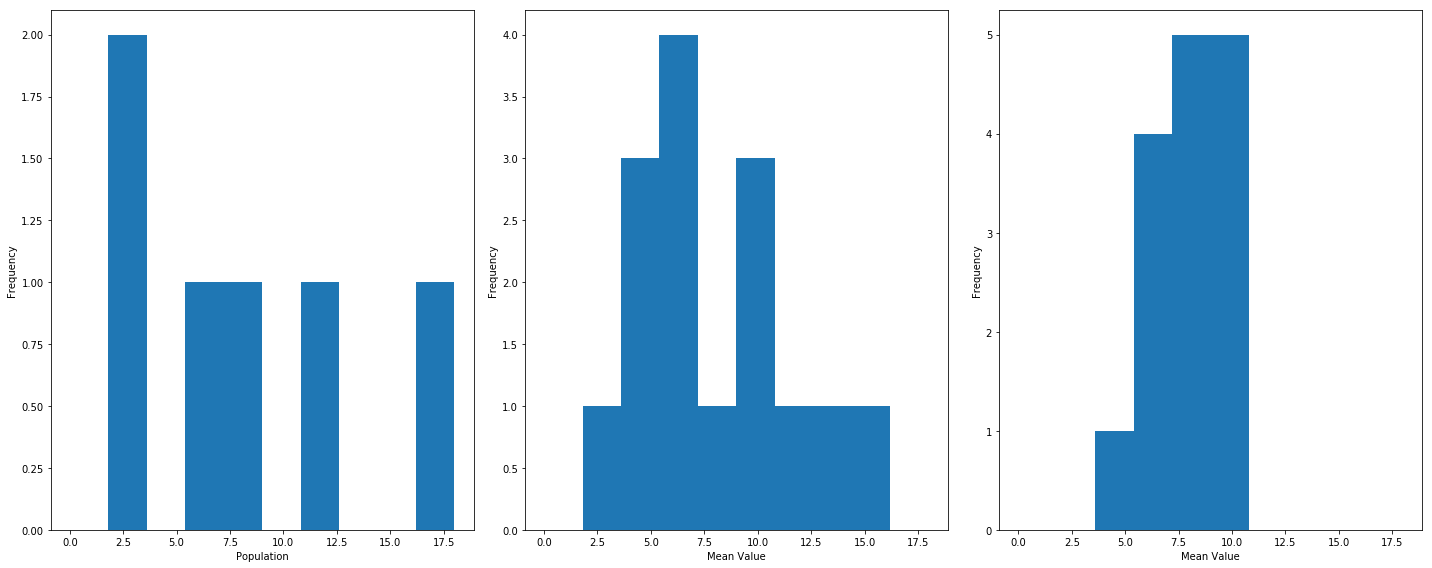

Figure 10: As the sample sizes increase, the variability of each sampling distribution decreases so that they become increasingly more leptokurtic.


In [25]:
combo2 = itertools.combinations(data, 2)
combo4 = itertools.combinations(data, 4)

plt.figure(figsize=(20,8)) 
plt.subplot(1,3,1)
plt.hist(data, range=(0,18))
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
plt.hist(np.array(list(c2mtotal)), range=(0,18))
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
plt.hist(np.array(list(c4mtotal)), range=(0,18))
plt.xlabel('Mean Value')
plt.ylabel('Frequency')

plt.tight_layout()    
plt.show()

print('Figure 10: As the sample sizes increase, the variability of each sampling distribution decreases so that they become increasingly more leptokurtic.')

----


----